# Decision Tree
---

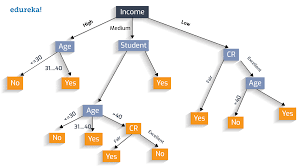

Decision Tree(의사결정 나무)는 트리(Tree) 기반의 분류 규칙을 만드는 ML 알고리즘입니다.

Decision Tree는 스무고개와 같은 방식으로 동작하며 If/Else 기반의 룰을 이용해 예측을 위한 규칙을 생성합니다.

하지만 Decision Tree에서 주의해야 할 점은 많은 규칙. 즉, Decision Tree의 깊이(Depth)가 깊어질수록 분류를 결정하는 방식이 복잡해지고 이는 과적합(Overfitting) 문제로 이어지기 쉽습니다.

이러한 문제로 인해 가지치기 라는 것을 진행하게 되는데 이는 Decision Tree의 깊이를 줄이는 행위로 노드를 줄이는 것입니다.

따라서 노드를 줄임에도 불구하고 높은 예측 정확도를 가지려면 어떻게 트리를 분할할 것인가가 중요한 이슈가 되겠습니다.

# Iris 데이터를 이용한 Decision Tree 시각화
---

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Decision Tree Classifier 생성
dt_clf = DecisionTreeClassifier()

# IRIS 데이터 로드, 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=25)

# Decision Tree 학습
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_test, y_test))

0.9666666666666667


정확도 0.966

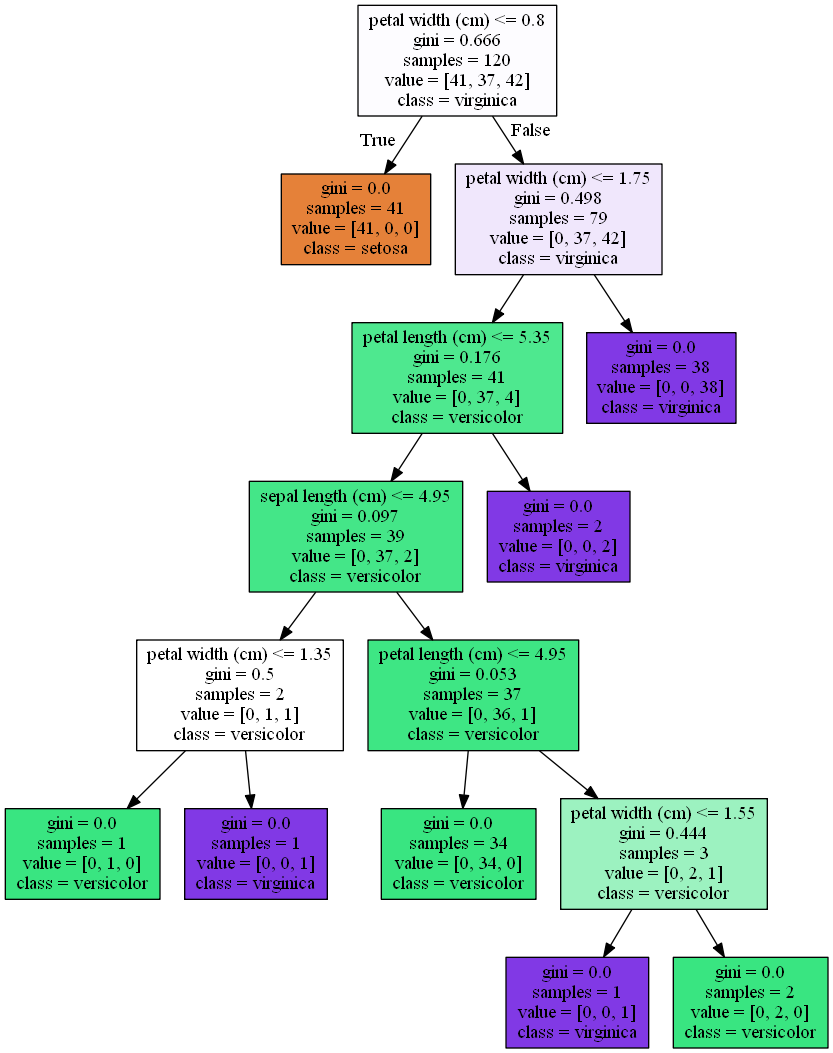

In [38]:
import os 

os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' 

from IPython.display import Image 
import pydotplus 
import graphviz 

dot_data = export_graphviz(dt_clf, out_file=None, class_names=iris.target_names, 
                           feature_names=iris.feature_names, impurity=True, filled=True) 

graph = pydotplus.graph_from_dot_data(dot_data) # Draw graph Image(graph.create_png())
Image(graph.create_png())

위 시각화 결과를 보면 어떠한 규칙에 따라 tree가 뻗어 나가는지 한눈에 알 수 있습니다.

위 트리에서 더 이상 자식이 없는 노드를 `리프 노드`라고 부릅니다. 여기서 최종 클래스가 결정됩니다.

자식 노드가 존재하는 노드를 `브랜치 노드`라고 부릅니다. 이는 자식 노드를 분할하기 위한 규칙을 가지고 있습니다.

- gini : value로 주어진 데이터 분포에서의 지니 계수


- samples : 현 규칙에 해당하는 데이터 건 수


- value : 클래스 값 기반 데이터 건수

# 하이퍼 파라미터 설정에 따른 트리 시각화
---

### max_depth = 3, 정확도 0.933

0.9333333333333333


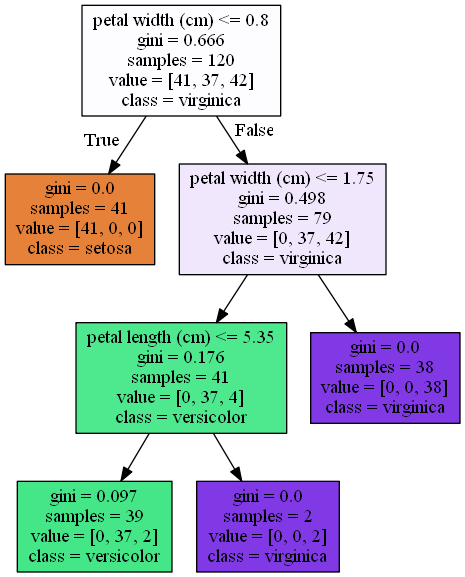

In [39]:
# max_depth = 3 Decision Tree Classifier 생성
dt_clf = DecisionTreeClassifier(max_depth = 3)

# Decision Tree 학습
dt_clf.fit(X_train, y_train)
print(dt_clf.score(X_test, y_test))


dot_data = export_graphviz(dt_clf, out_file=None, class_names=iris.target_names, 
                           feature_names=iris.feature_names, impurity=True, filled=True) 

graph = pydotplus.graph_from_dot_data(dot_data) # Draw graph Image(graph.create_png())
Image(graph.create_png())

- max_depth는 Decision Tree의 최대 트리 깊이를 제한하며 더 간결한 트리가 생성됩니다.

### min_samples_split = 4, 정확도 0.933

정확도 0.933

0.9333333333333333


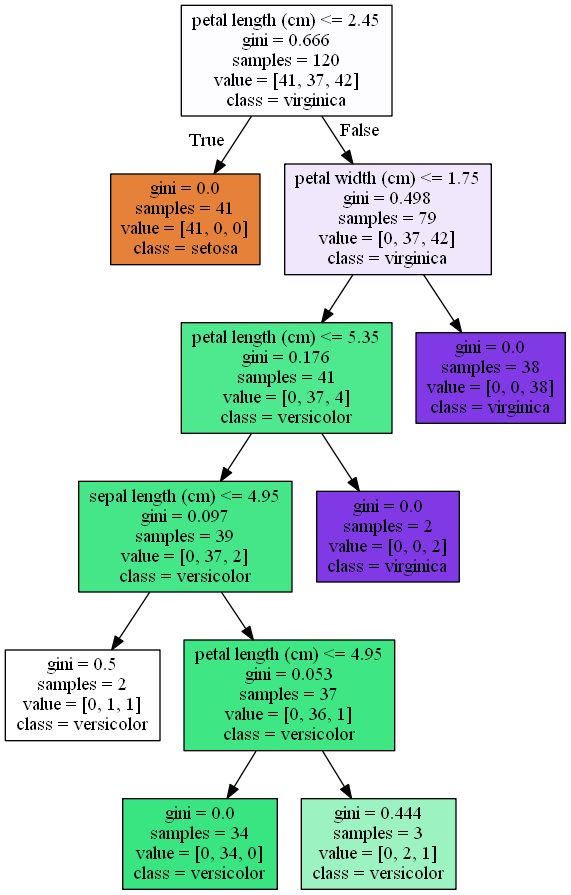

In [40]:
# max_depth = 3 Decision Tree Classifier 생성
dt_clf = DecisionTreeClassifier(min_samples_split=4)

# Decision Tree 학습
dt_clf.fit(X_train, y_train)
print(dt_clf.score(X_test, y_test))

dot_data = export_graphviz(dt_clf, out_file=None, class_names=iris.target_names, 
                           feature_names=iris.feature_names, impurity=True, filled=True) 

graph = pydotplus.graph_from_dot_data(dot_data) # Draw graph Image(graph.create_png())
Image(graph.create_png())

### min_samples_split, 정확도 0.966
- 자식 규칙 노드를 분할하기 위한 최소한의 샘플 수입니다. 따라서 트리의 깊이도 줄고 간결한 트리 생성이 가능합니다.

정확도 0.966

0.9666666666666667


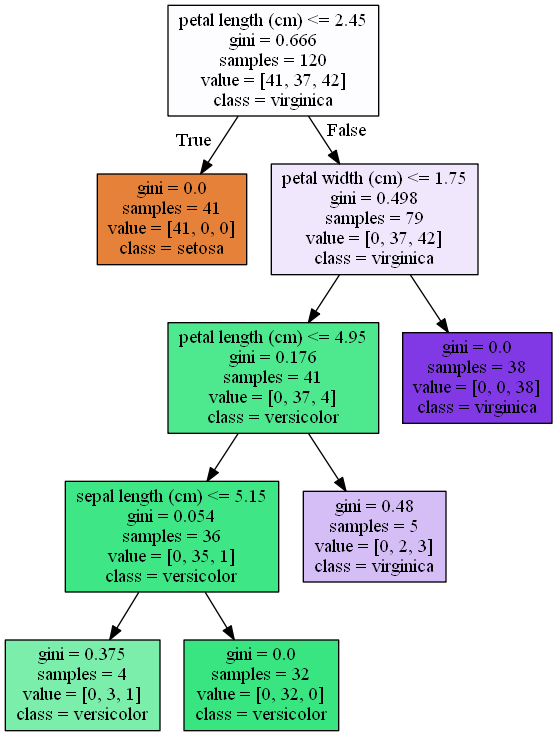

In [41]:
# max_depth = 3 Decision Tree Classifier 생성
dt_clf = DecisionTreeClassifier(min_samples_leaf=4)

# Decision Tree 학습
dt_clf.fit(X_train, y_train)
print(dt_clf.score(X_test, y_test))

dot_data = export_graphviz(dt_clf, out_file=None, class_names=iris.target_names, 
                           feature_names=iris.feature_names, impurity=True, filled=True) 

graph = pydotplus.graph_from_dot_data(dot_data) # Draw graph Image(graph.create_png())
Image(graph.create_png())

- min_samples_leaf 는 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정합니다.

# Feature_imporances
---

분류를 위한 트리 계열의 또 다른 장점으로는 `Feature Importances`가 있습니다.

트리란 결국 균일도를 기반으로 어떠한 속성을 규칙 조건으로 선택합니다.  

이 때 트리가 사용하는 피처의 중요한 역할 지표를 Feature_importances(특성 중요도)라고 합니다.

FEATURE : sepal length (cm) | VALUE : 0.005849235943554882
FEATURE : sepal width (cm) | VALUE : 0.0
FEATURE : petal length (cm) | VALUE : 0.5713967396198127
FEATURE : petal width (cm) | VALUE : 0.42275402443663235


<AxesSubplot:>

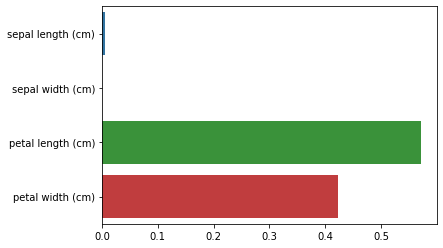

In [49]:
import seaborn as sns
import numpy as np

for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('FEATURE : {} | VALUE : {}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

위 feature importance를 통해 petal length가 가장 중요한 피쳐로 사용된 것을 알 수 있습니다.

이처럼 Decision Tree는 알고리즘 자체가 굉장히 직관적이기 때문에 알고리즘과 관련된 요소를 시각적으로 표현할 수 있는 다양한 방안이 존재합니다.

# 과적합 문제 (Overfitting)
---

Decision Tree는 매우 직관적이고 성능이 좋은 알고리즘입니다. 하지만 앞서 언급했듯이 과적합 문제 해결이 주 이슈입니다.

따라서 Decision Tree에서 어떻게 과적합 문제가 발생하는지 Seaborn의 iris 데이터 세트를 이용해 시각화 해보겠습니다.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

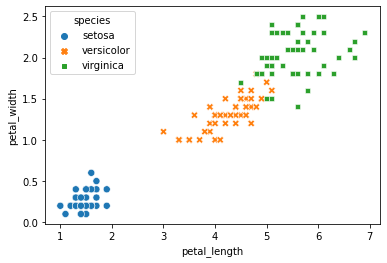

In [66]:
iris = sns.load_dataset('iris')
sns.scatterplot(x='petal_length',
               y='petal_width',
               hue='species',
               style='species',
               s=50,
               data=iris)
plt.show()

In [68]:
X = np.array(iris[['petal_length', 'petal_width']])
y = iris['species']
y = np.where(y=='setosa', 0, np.where(y=='versicolor', 1, 2))
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier()

(a) 이제 x 축('petal_length')과 y 축('petal_width')의 최소값, 최대값을 구하고, (b) 이들 x축과 y축의 최소값 ~ 최대값 사이의 구간을 h = 0.01 단위의 간격으로 좌표를 생성하여, (c) np.meshgrid()로 이들 x축과 y축의 h=0.01 단위의 좌표 벡터를 가지고 격자 행렬을 생성합니다. 

(d) 이렇게 생성한 격자 행렬 좌표값들에 대해 Decision Tree Classifier 훈련된 모델의 predict() 메소드로 예측을 하여 contour plot의 높이에 해당하는 Z 값을 구합니다. 

In [70]:
# create coordinate matrices from x_min~x_max, y_min~y_max coordinates
h = 0.01
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
XY = np.c_[xx.ravel(), yy.ravel()]

# predict
pred_cls = dt_clf.predict(XY)
# align the shape of Z with xx

Z = pred_cls.reshape(xx.shape)

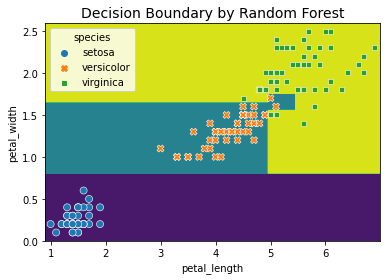

In [76]:
plt.contourf(xx, yy, Z)
sns.scatterplot(x='petal_length', 
                y='petal_width', 
                hue='species', 
                style='species', 
                s=50, 
                data=iris)
plt.title('Decision Boundary by Random Forest', fontsize=14)
plt.show()

- https://rfriend.tistory.com/547 님의 글을 참고하였습니다.

위 결과를 보면 일부 이상치 데이터(가운데 X 마커)까지 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 매우 많아집니다.

이 경우는 학습 데이터에 너무 fit하여 새로운 데이터가 들어왔을 때 예측 정확도가 떨어지는 문제가 발생할 수 있습니다.

이번에는 min_samples_leaf를 6으로 설정해 자식 규칙 노드를 분할하기 위한 최소한의 샘플 수를 조정해보겠습니다.

In [78]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=6)

In [80]:
# create coordinate matrices from x_min~x_max, y_min~y_max coordinates
h = 0.01
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
XY = np.c_[xx.ravel(), yy.ravel()]

# predict
pred_cls = dt_clf.predict(XY)
# align the shape of Z with xx

Z = pred_cls.reshape(xx.shape)

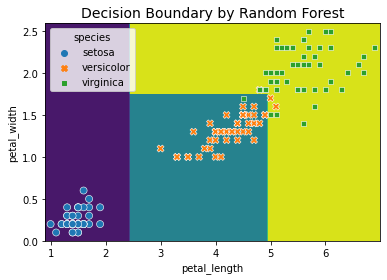

In [81]:
plt.contourf(xx, yy, Z)
sns.scatterplot(x='petal_length', 
                y='petal_width', 
                hue='species', 
                style='species', 
                s=50, 
                data=iris)
plt.title('Decision Boundary by Random Forest', fontsize=14)
plt.show()

이번엔 확실히 이상치에 민감하게 반응하지 않고 일반화 된 분류 규칙에 따라 분류된 것을 확인할 수 있습니다.

실제로 Accuracy를 확인해보면 약간의 제약이 들어간 트리 모델이 더 정확도가 높게 측정됩니다.

즉, 학습데이터에 과도하게 Fit한 모델은 새로운 데이터에 취약해 정확도가 떨어질 수 있습니다.